# Data Science - Just Sampling

### Import

In [2]:
#Import문 - Import 추가로 할게 있다면 여기다가 해주세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#샘플링 관련 라이브러리들
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


### 함수선언은 여기에 해주면 됨

In [3]:
#인코딩 / 라벨링함수
def encode_and_transform_datas(df):
    # 1. 라벨 인코딩할 열들 지정
    label_cols = ['Card Brand', 'Card Type', 'Error Message', 'Is Fraud?']
    
    # 2. 각 열에 대해 라벨 인코딩 수행
    label_encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # 나중에 필요하면 인코더 저장 (복원할 때 사용 가능)
    
    # 3. 날짜 데이터를 8자리 숫자로 변환
    # 'Expires' 변환 (MM/YYYY -> YYYYMMDD)
    df['Expires'] = df['Expires'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 'Acct Open Date' 변환 (MM/YYYY -> YYYYMMDD)
    df['Acct Open Date'] = df['Acct Open Date'].apply(lambda x: x.split('/')[1] + x.split('/')[0] + '01')
    
    # 날짜 형식을 int 타입으로 변환
    df['Expires'] = df['Expires'].astype(int)
    df['Acct Open Date'] = df['Acct Open Date'].astype(int)
    
    # 인코딩된 데이터프레임 반환
    return df
#Is Fraud : Yes-1, No-0으로 Labeled


In [8]:
#Correlation Matrix 출력함수
def correlation_write(df, path='../datas/파생/correlation_matrix.csv'):
    # 상관관계 계산
    correlation_matrix = df.corr()
    
    # 상관관계 결과를 CSV로 저장
    correlation_matrix.to_csv(path)
    
    # 히트맵 그리기
    plt.figure(figsize=(10, 8)) 
    plt.title("Correlation Heatmap", fontsize=16)
    
    # Seaborn 히트맵 사용 (각 칸에 상관계수 표시)
    sns.heatmap(
        correlation_matrix, 
        annot=True,          # 상관계수 표시
        cmap='coolwarm', 
        linewidths=0.5, 
        fmt=".2f",           # 소수점 둘째 자리까지 표시
        annot_kws={"size": 10} # 상관계수 숫자의 글꼴 크기 지정
    )

    plt.tight_layout()
    plt.show()

In [5]:
# Classification Report, Confusion Matrix 출력함수
def print_classification_report_and_confusion_matrix(model, X_test, y_test):
    # 예측값 생성
    y_pred = model.predict(X_test)
    
    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # 분류 리포트 출력 (Precision, Recall, F1-score 등)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix 출력
    cm = confusion_matrix(y_test, y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    matrix.plot(cmap='coolwarm')
    for text in matrix.text_.ravel():
        text.set_color("black")
    plt.grid(False)
    plt.show()


In [6]:
#샘플링 관련 함수들 모음
# 언더샘플링 함수
def apply_undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

# 오버샘플링 함수
def apply_oversampling(X, y):
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    return X_res, y_res

# SMOTE 함수
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

---
---
---  

### 여기서부터가 찐구현
#### 데이터 불러오기

Index(['User', 'Gender', 'Current Age', 'Retirement Age', 'Birth Year',
       'Birth Month', 'Zipcode', 'Per Capita Income - Zipcode',
       'Yearly Income', 'Total Debt', 'Credit Score', 'Year', 'Month', 'Day',
       'Merchandise Code', 'Card', 'Card Brand', 'Card Type', 'Card Number',
       'Expires', 'Has Chip', 'Credit Limit', 'Acct Open Date',
       'Year PIN last Changed', 'Amount', 'Whether Security Chip is Used',
       'Error Message', 'Is Fraud?'],
      dtype='object')


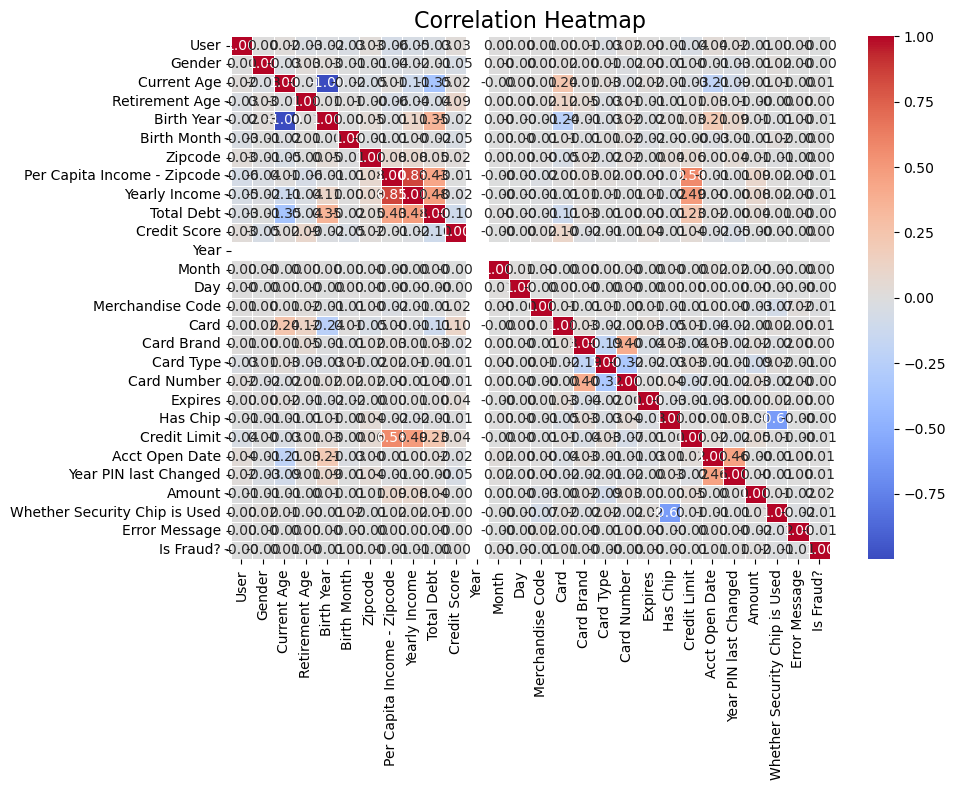

In [9]:
train_data = pd.read_csv('../datas/train.csv')
encode_and_transform_datas(train_data)
print(train_data.columns)
correlation_write(train_data)

<span style="color:red">여기가 내가 추가한 샘플링 코드</span>

#### Train / Test Dataset 분리하기
<span style='color:red'>+샘플링 적용하였음.</span>

In [10]:
X = train_data.drop(columns=['Is Fraud?'])
y = train_data['Is Fraud?']


# 언더샘플링 적용
X_undersampled, y_undersampled = apply_undersampling(X, y)

# 오버샘플링 적용
X_oversampled, y_oversampled = apply_oversampling(X, y)

# SMOTE 적용
X_smote, y_smote = apply_smote(X, y)

# 각각의 샘플링 방법으로 나눈 데이터를 train_test_split 사용 가능
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [11]:
# 샘플링 결과에 따라 데이터를 train/test 셋으로 분할
sampling_methods = {
    'undersampling': (X_undersampled, y_undersampled),
    'oversampling': (X_oversampled, y_oversampled),
    'smote': (X_smote, y_smote)
}

--- undersampling ---
Logistic Regression Results:
Accuracy: 0.5090

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       709
           1       0.00      0.00      0.00       684

    accuracy                           0.51      1393
   macro avg       0.25      0.50      0.34      1393
weighted avg       0.26      0.51      0.34      1393



c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


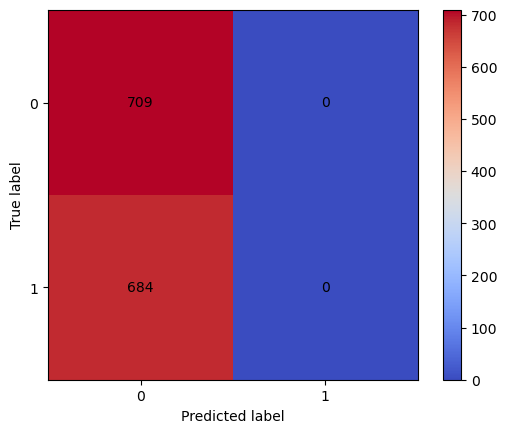

Random Forest Results:
Accuracy: 0.9454

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       709
           1       0.91      0.98      0.95       684

    accuracy                           0.95      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.95      0.95      0.95      1393



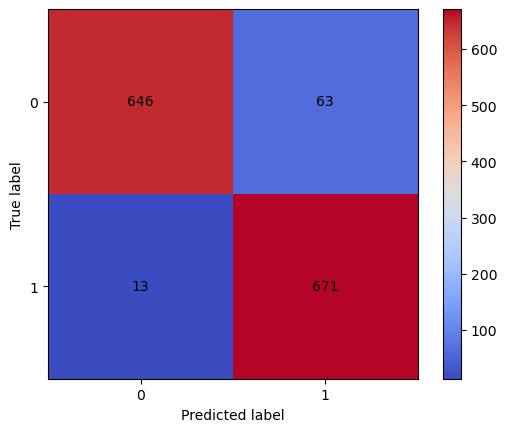

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.106935
21                   Credit Limit    0.054072
18                    Card Number    0.052865
24                         Amount    0.052226
0                            User    0.050931
7     Per Capita Income - Zipcode    0.050597
22                 Acct Open Date    0.049762
8                   Yearly Income    0.048736
10                   Credit Score    0.048137
12                          Month    0.046300
9                      Total Debt    0.046171
6                         Zipcode    0.045652
4                      Birth Year    0.043265
19                        Expires    0.042386
2                     Current Age    0.040526
23          Year PIN last Changed    0.038056
3                  Retirement Age    0.034032
25  Whether Security Chip is Used    0.030282
13                            Day    0.030253
5                     Birth Month    0.029556
15           

c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


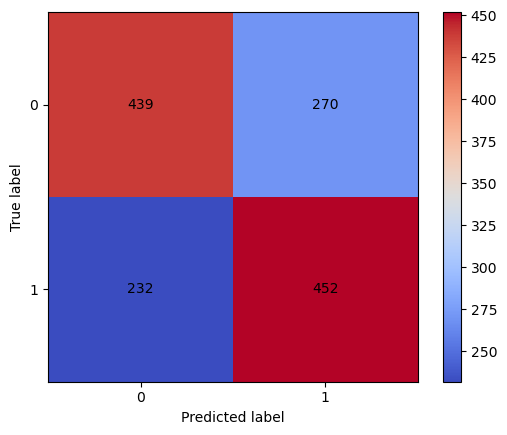



--- oversampling ---
Logistic Regression Results:
Accuracy: 0.5001

Classification Report:


c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492854
           1       0.00      0.00      0.00    492615

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469



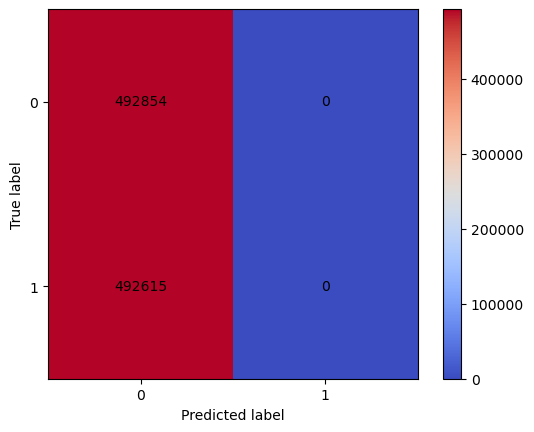

Random Forest Results:
Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492854
           1       1.00      1.00      1.00    492615

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469



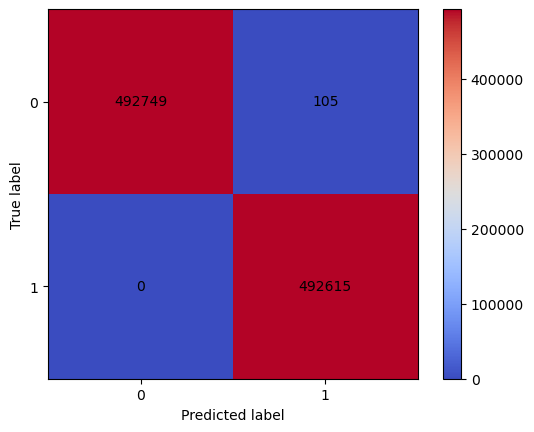

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.133726
12                          Month    0.060228
0                            User    0.054132
21                   Credit Limit    0.052751
22                 Acct Open Date    0.051161
18                    Card Number    0.050616
7     Per Capita Income - Zipcode    0.047536
8                   Yearly Income    0.046990
6                         Zipcode    0.044699
10                   Credit Score    0.044647
9                      Total Debt    0.043935
19                        Expires    0.042496
4                      Birth Year    0.041521
24                         Amount    0.039235
2                     Current Age    0.038399
25  Whether Security Chip is Used    0.036879
23          Year PIN last Changed    0.033220
3                  Retirement Age    0.030423
5                     Birth Month    0.027905
13                            Day    0.025086
15           

c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.6609

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    492854
           1       0.65      0.68      0.67    492615

    accuracy                           0.66    985469
   macro avg       0.66      0.66      0.66    985469
weighted avg       0.66      0.66      0.66    985469



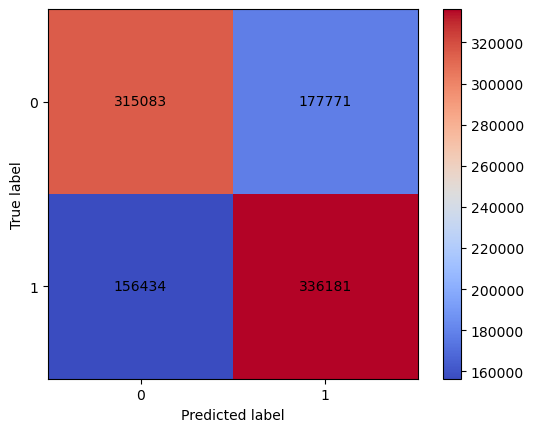



--- smote ---
Logistic Regression Results:
Accuracy: 0.5001

Classification Report:


c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    492854
           1       0.00      0.00      0.00    492615

    accuracy                           0.50    985469
   macro avg       0.25      0.50      0.33    985469
weighted avg       0.25      0.50      0.33    985469



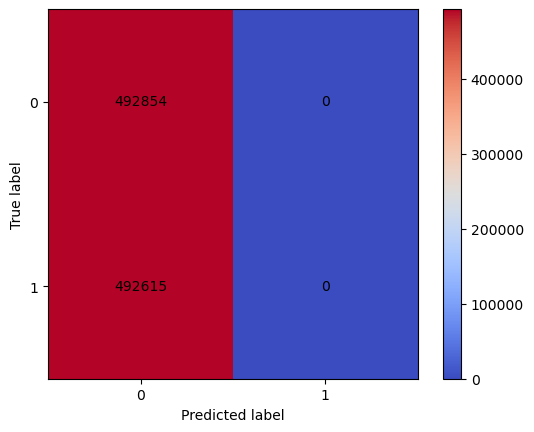

Random Forest Results:
Accuracy: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492854
           1       1.00      1.00      1.00    492615

    accuracy                           1.00    985469
   macro avg       1.00      1.00      1.00    985469
weighted avg       1.00      1.00      1.00    985469



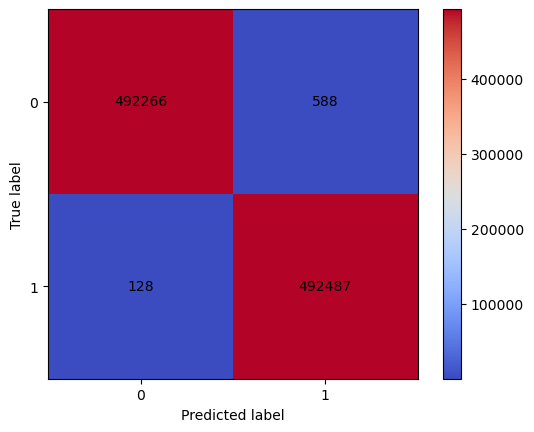

Feature Importances:
                          Feature  Importance
14               Merchandise Code    0.181472
12                          Month    0.053702
21                   Credit Limit    0.050950
0                            User    0.049092
18                    Card Number    0.048382
22                 Acct Open Date    0.047010
19                        Expires    0.044295
8                   Yearly Income    0.044239
10                   Credit Score    0.044085
7     Per Capita Income - Zipcode    0.043444
6                         Zipcode    0.042753
9                      Total Debt    0.041798
4                      Birth Year    0.040090
2                     Current Age    0.035661
25  Whether Security Chip is Used    0.034987
24                         Amount    0.031736
23          Year PIN last Changed    0.029746
5                     Birth Month    0.027371
3                  Retirement Age    0.027103
13                            Day    0.020138
15           

c:\Users\user\anaconda3\envs\py310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.6777

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67    492854
           1       0.67      0.70      0.68    492615

    accuracy                           0.68    985469
   macro avg       0.68      0.68      0.68    985469
weighted avg       0.68      0.68      0.68    985469



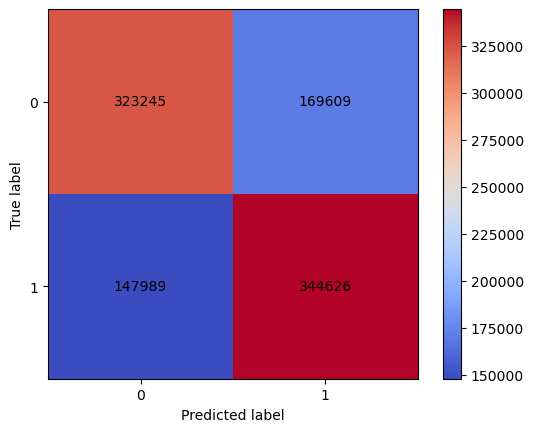

In [12]:
# 모델 학습 및 평가
for method_name, (X_sampled, y_sampled) in sampling_methods.items():
    print(f"--- {method_name} ---")
    
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)
    
    # 로지스틱회귀
    print("Logistic Regression Results:")
    model = LogisticRegression(penalty='l2', fit_intercept=False, class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(model, X_test, y_test)
    
    # 랜덤포레스트
    print("Random Forest Results:")
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(rf, X_test, y_test)
    
    # Feature Importance 출력
    importances = rf.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importances)
    
    # SVM(Linear)
    print("Linear SVC Results:")
    svm = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', class_weight='balanced', dual=False, max_iter=1000))
    svm.fit(X_train, y_train)
    print_classification_report_and_confusion_matrix(svm, X_test, y_test)

    print("\n" + "="*50 + "\n")